In [2]:
#Import neccessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import preprocessing


In [3]:
#Read in the different datasets
#Read in store
store=pd.read_csv('../data/store.csv')
#Read in test data
test=store_data=pd.read_csv('../data/test.csv')

#Read in train data 
train=store_data=pd.read_csv('../data/train.csv')

#Read in sample submission 
sample_submission=store_data=pd.read_csv('../data/sample_submission.csv')

train.shape, test.shape, store.shape

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((1017209, 9), (41088, 8), (1115, 10))

In [4]:
#Let us look at the store data
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
#Let us look at the test data
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#Let us look at sample submission 
sample_submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 11)

There are no duplicates and Testing dataset has 11 null values.

In [8]:
#Check for when training and testing  data starts and when it ends 

print("Training data starts from: {}".format(train.Date.min()))
print("Training data end on: {}".format(train.Date.max()))
print()
print("Testing data starts from: {}".format(test.Date.min()))
print("Testing data end on: {}".format(test.Date.max()))

Training data starts from: 2013-01-01
Training data end on: 2015-07-31

Testing data starts from: 2015-08-01
Testing data end on: 2015-09-17


Join train with store data 

In [9]:
#check if the store column in train is the same. as that in the store 
train.Store.nunique() == store.Store.nunique()

True

In [11]:
#Join store and train data 
df_combined = train.merge(store, how='left', left_on=train.Store, right_on=store.Store)
df_combined.drop(['key_0', 'Store_y'], axis=1, inplace=True)
df_combined = df_combined.rename(columns={'Store_x':'Store'})
df_combined.shape

(1017209, 18)

In [12]:
#Let us get summary statistics 
round(df_combined.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


As it can be seen there are 1115 stores we are dealing with 

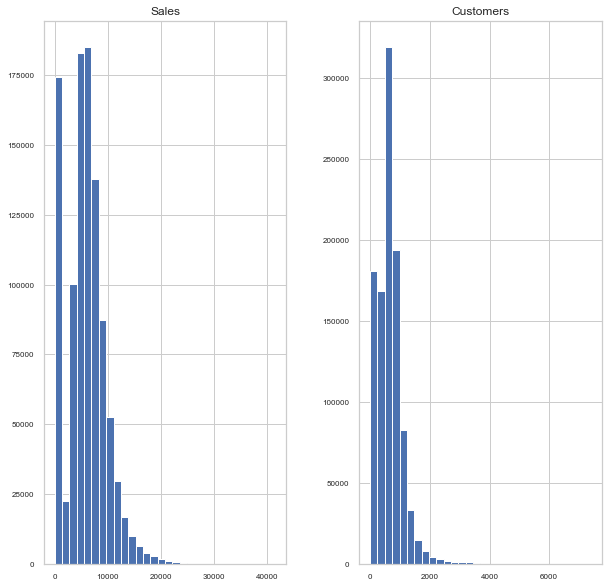

In [167]:
#We can plot the numeric data to get a quick look at the distributions.

df = train[['Sales', 'Customers']]
df.hist(figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8);

Both sales and customers have a smooth distribution

# Check for seasonality 

In [168]:
df_combined.Date = pd.to_datetime(df_combined.Date)
df_combined['Day'] = df_combined.Date.dt.day
df_combined['Month'] = df_combined.Date.dt.month
df_combined['Year'] = df_combined.Date.dt.year
df_combined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013


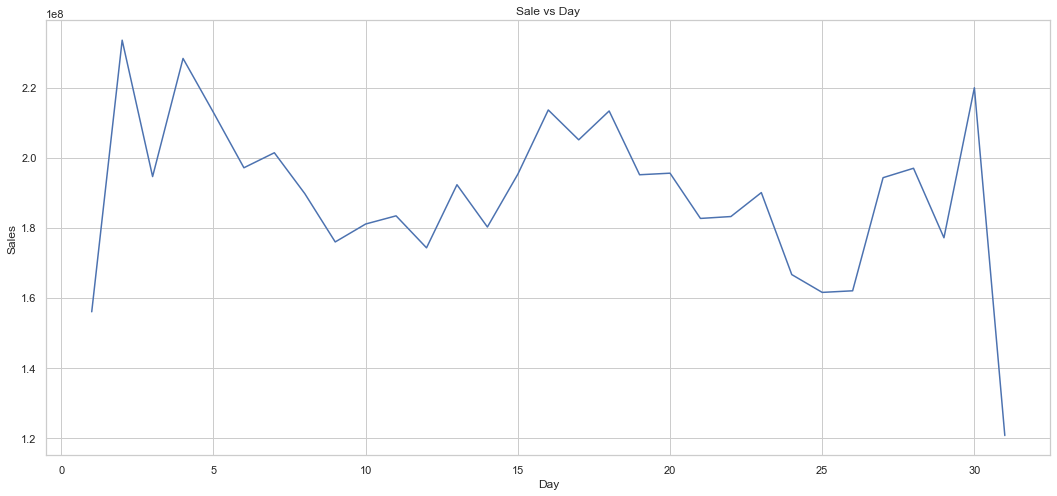

In [169]:
#let us make a plot of sales vs day 

plt.figure(figsize=(18,8))
plt.plot(df_combined.groupby(df_combined.Day).sum().Sales)
plt.title("Sale vs Day")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

As it can be seen most sales are done in the begining of the month and they remain abit up and then drop at the end of the month

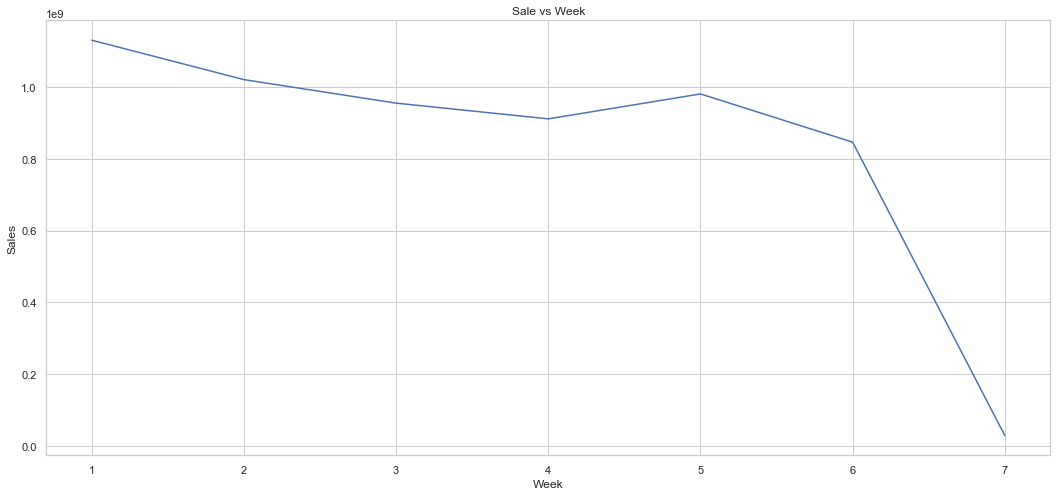

In [196]:
#let us check for sales vs weeks 

plt.figure(figsize=(18,8))
plt.plot(df_combined.groupby(df_combined.DayOfWeek).sum().Sales)
plt.title("Sale vs Week")
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

As it can be seen sales are more in the begining of the week and very low on sunday , this maybe because most stores are closed on sundays

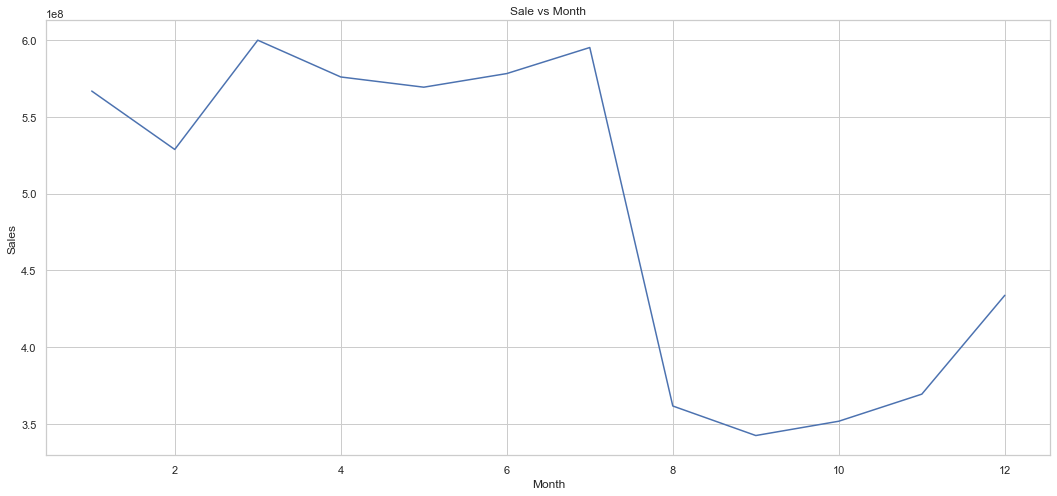

In [171]:
#check for sales vs months 
plt.figure(figsize=(18,8))
plt.plot(df_combined.groupby(df_combined.Month).sum().Sales)
plt.title("Sale vs Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

As it can be seen sales are high during the begging of the year and less towards the end of the year but start picking up in December 

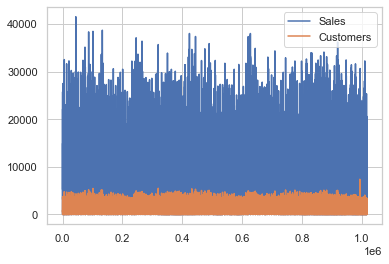

In [172]:
#check for seasonality 
train['Date'] = pd.to_datetime(train['Date']).dt.date
train_modified =train[['Date','Sales','Customers']]
train_modified.plot()
pyplot.show()


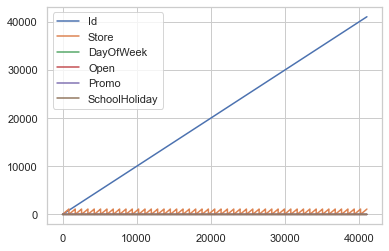

In [173]:
#Check for seasonality in the test data 
test['Date'] = pd.to_datetime(test['Date']).dt.date
test.plot()
pyplot.show()



In [174]:
#checking for correlation 
train.corr(method ='pearson')

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


The corealation of 0.89 between the sales and customers indicates a strong correlation 

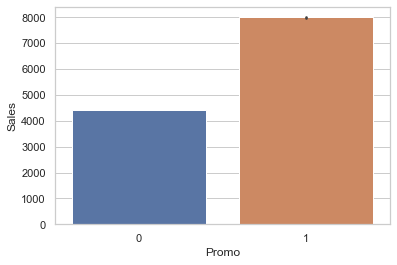

In [175]:
#checking for how prom afftects sales 
sns.barplot(x = train['Promo'], y = train['Sales'])
plt.show()

As it can be seen when there are promos the sales are high or increase compared when there is no promo running 

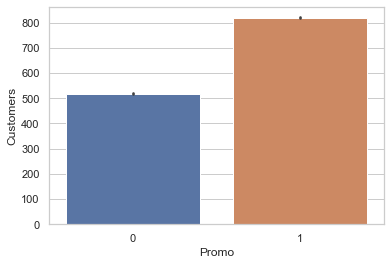

In [176]:
sns.barplot(x = train['Promo'], y = train['Customers'])
plt.show()

In [178]:
#checking for mean amount spent by a customer when there is a promo and when there is no promo 

with(train[train$Sales != 0 & train$Promo == 0], mean(Sales / Customers))



SyntaxError: invalid syntax (<ipython-input-178-0d81ba5e8c3f>, line 3)

# How does promo affect sales?

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

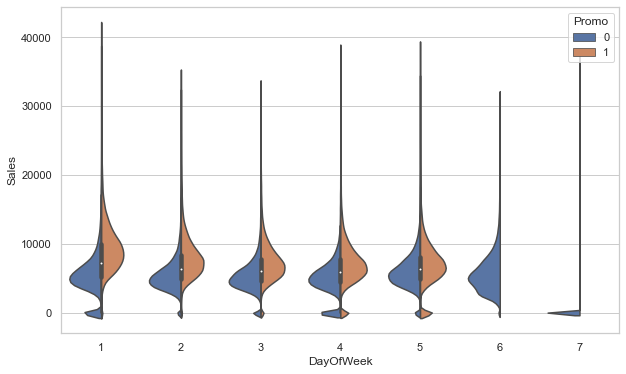

In [179]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='DayOfWeek',y='Sales',hue='Promo',split=True,data=df_combined)


It can be seen that the distribution of sales is higher when there is a promotion

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

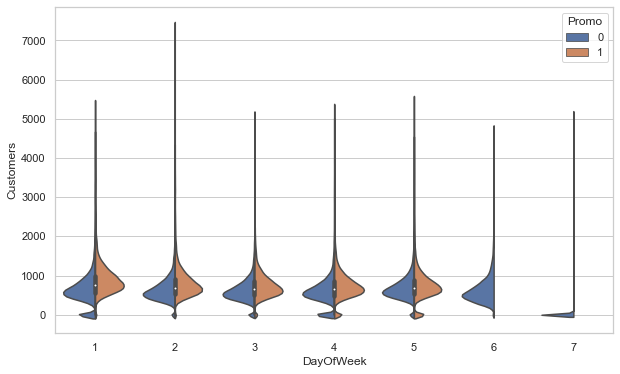

In [180]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='DayOfWeek',y='Customers',hue='Promo',split=True,data=df_combined)

As it can be seen the promotions do not necessary increase the number of customers or new customers 

The promos are causing the existing customers to purchase more but 
not necessary increasing the number of customer as derived from the above two graphs 

# How does the distance to the next competitor affect sales?

<Figure size 864x432 with 0 Axes>

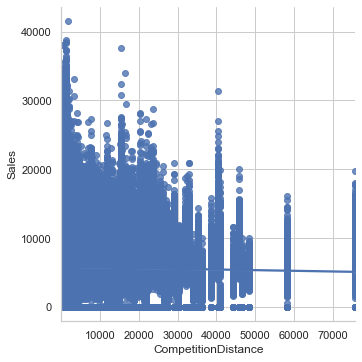

In [181]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.lmplot(x='CompetitionDistance',y='Sales',data=df_combined)

As it can be seen the distance of then next competitor does not affect sales  

In [ ]:
train_modified

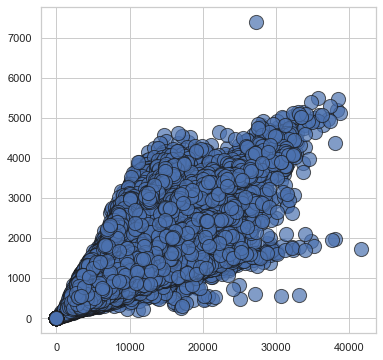

In [182]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df_combined['Sales'],df_combined['Customers'] ,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200)
plt.show()

# Trends of customer behavior during store open and closing times


<AxesSubplot:xlabel='Month', ylabel='Customers'>

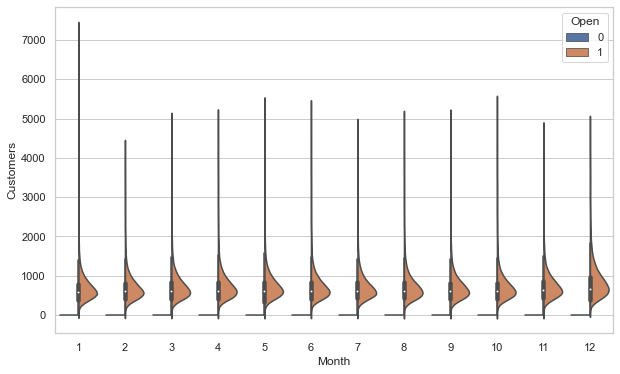

In [183]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.violinplot(x='Month',y='Customers',hue='Open',split=True,data=df_combined)


# Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [184]:

#st =df_combined.loc[df['DayOfWeek'] == 7] & df_combined.loc[df['Promo'] == 1]

Open_stores_weekdays = df_combined[(df_combined['DayOfWeek'] <6  ) & (df_combined['Open'] ==1)]
Open_stores_weekdays.Store.unique()


array([   1,    2,    3, ..., 1115,  876,  292])

In [185]:
df_combined['Assortment']

0          a
1          a
2          a
3          c
4          a
          ..
1017204    a
1017205    c
1017206    c
1017207    c
1017208    c
Name: Assortment, Length: 1017209, dtype: object

# Check how the assortment type affects sales

In [186]:
#Encode assortment 

assortment_encoder = preprocessing.LabelEncoder()
df_combined['Assortment'] = assortment_encoder.fit_transform(df_combined['Assortment'])

In [187]:
df_combined['Assortment'].value_counts()

0    537445
2    471470
1      8294
Name: Assortment, dtype: int64

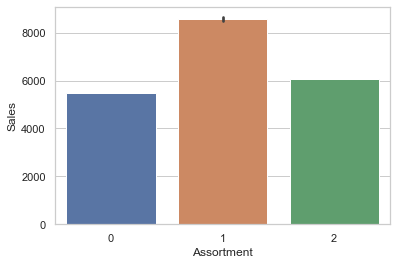

In [188]:
sns.barplot(x = df_combined['Assortment'], y = df_combined['Sales'])
plt.show()

Different Assortment are have different sales as it can be seen 

# How does the opening or reopening of new competitors affect stores? 
Check for stores with NA as competitor distance but later on has values for competitor distance


In [189]:
stores_withNull =df_combined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013


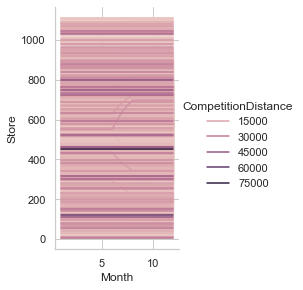

In [195]:
#df_combined_melted = df_combined.melt("Year",var_name="Store&CompetitionDistance",value_name="Rating")
sns.relplot(data=df_combined, x="Month", y="Store", hue="CompetitionDistance",kind="line", height=4, aspect=.7)
    

# Reference 


https://www.kaggle.com/shivam017arora/rossmann-store-sales-0-10377-score-solution


https://www.kaggle.com/jeonghyunjhkim/rossmann-store-sales-data-preprocessing-and-eda

In [66]:
def joinDF(df1,df2):
    df1.Store.nunique() == df2.Store.nunique()
    df_combined = df1.merge(df2, how='left', left_on=df1.Store, right_on=df2.Store)
    df_combined.drop(['key_0', 'Store_y'], axis=1, inplace=True)
    df_combined = df_combined.rename(columns={'Store_x': 'Store'})
    return df_combined

        
        
   

In [43]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [67]:

joinDF(train,store)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [29]:
column

'Store'

In [41]:
train.column.nunique()

AttributeError: 'DataFrame' object has no attribute 'column'